# Chapter 10: Clustering data into groups

In [2]:
# Clustering: Process of organizing data points into conceptually meaningful groups
# 10.1 Using centrality to discover clusters
# Modeling dart coordinates using two normal distributions
import numpy as np
np.random.seed(0)
mean = 0
variance = 2
x = np.random.normal(mean, variance ** 0.5)
y = np.random.normal(mean, variance ** 0.5)
print(f"The x coordinate of a randomly thrown dart is {x:.2f}")
print(f"The y coordinate of a randomly thrown dart is {y:.2f}")

The x coordinate of a randomly thrown dart is 2.49
The y coordinate of a randomly thrown dart is 0.57


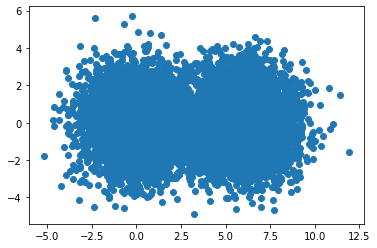

In [3]:
# Simulating 5000 darts thrown at [0,0] and 5000 thrown at [6,0]
import matplotlib.pyplot as plt
np.random.seed(1)
bulls_eye1 = [0, 0]
bulls_eye2 = [6, 0]
bulls_eyes = [bulls_eye1, bulls_eye2]
x_coordinates, y_coordinates = [], []
for bulls_eye in bulls_eyes:
    for _ in range (5000):
        x = np.random.normal(bulls_eye[0], variance ** 0.5)
        y = np.random.normal(bulls_eye[1], variance ** 0.5)
        x_coordinates.append(x)
        y_coordinates.append(y)
        
plt.scatter(x_coordinates, y_coordinates)
plt.show()

In [5]:
# Euclidean Distance: the standard straight-line distance between two points
# Assigning darts to the nearest bull's eye
from scipy.spatial.distance import euclidean
def nearest_bulls_eye(dart):
    distances = [euclidean(dart, bulls_e) for bulls_e in bulls_eyes]
    return np.argmin(distances)

darts = [[0,1], [6,1]]
for dart in darts:
    index = nearest_bulls_eye(dart)
    print(f"The dart at postition {dart} is closest to bulls-eye {index}")

The dart at postition [0, 1] is closest to bulls-eye 0
The dart at postition [6, 1] is closest to bulls-eye 1


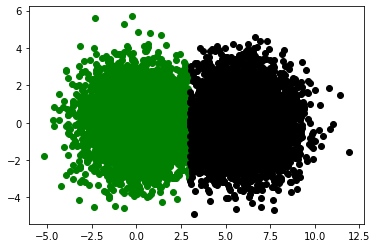

In [8]:
# Coloring darts based on the nearest bull's-eye
def color_by_cluster(darts):
    nearest_bulls_eyes = [nearest_bulls_eye(dart) for dart in darts]
    for bs_index in range(len(bulls_eyes)):
        selected_darts = [darts[i] for i in range(len(darts)) if bs_index == nearest_bulls_eyes[i]]
        x_coordinates, y_coordinates = np.array(selected_darts).T
        plt.scatter(x_coordinates, y_coordinates, color=['g', 'k'][bs_index])
    plt.show()
                    
darts = [[x_coordinates[i], y_coordinates[i]] for i in range(len(x_coordinates))]
color_by_cluster(darts)

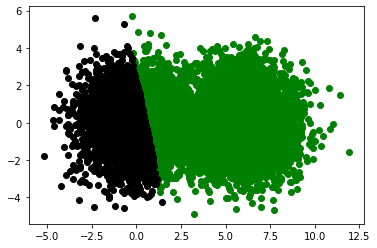

In [9]:
# Assigning darts to randomly chosen centers
bulls_eyes = np.array(darts[:2])
color_by_cluster(darts)

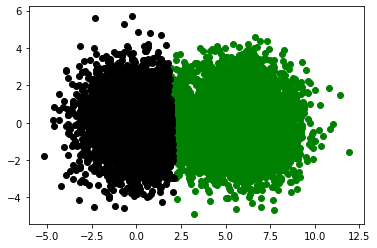

In [11]:
# Assigning darts to centers based on means
def update_bulls_eyes(darts):
    updated_bulls_eyes = []
    nearest_bulls_eyes = [nearest_bulls_eye(dart) for dart in darts]
    for bs_index in range(len(bulls_eyes)):
        selected_darts = [darts[i] for i in range(len(darts)) if bs_index == nearest_bulls_eyes[i]]
        x_coordinates, y_coordinates = np.array(selected_darts).T
        mean_center = [np.mean(x_coordinates), np.mean(y_coordinates)]
        updated_bulls_eyes.append(mean_center)
        
    return updated_bulls_eyes

bulls_eyes = update_bulls_eyes(darts)
color_by_cluster(darts)     

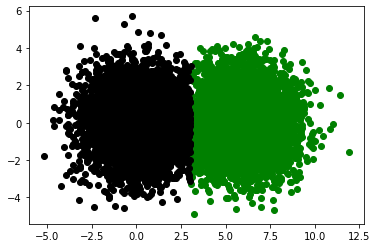

In [12]:
# Adjusting bull's-eye positions over 10 iterations
for i in range(10):
    bulls_eyes = update_bulls_eyes(darts)
    
color_by_cluster(darts)

In [13]:
# 10.2 K-means: A clustering algorithm for grouping data into K central groups
# 10.2.1 K-means clustering using scikit-learn
from sklearn.cluster import KMeans

In [14]:
# K-means clustering using scikit-learn
cluster_model = KMeans(n_clusters=2)
assigned_bulls_eyes = cluster_model.fit_predict(darts)

print("Bull's-eye assignments:")
print(assigned_bulls_eyes)

Bull's-eye assignments:
[0 0 0 ... 1 1 1]


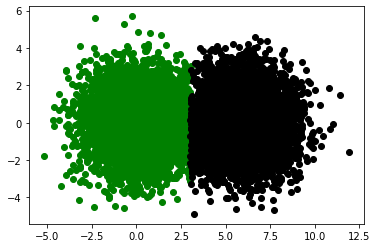

In [15]:
# Plotting K-means cluster assignments
for bs_index in range(len(bulls_eyes)):
    selected_darts = [darts[i] for i in range(len(darts)) if bs_index == assigned_bulls_eyes[i]]
    x_coordinates, y_coordinates = np.array(selected_darts).T
    plt.scatter(x_coordinates, y_coordinates, color=['g', 'k'][bs_index])
plt.show()

In [16]:
new_darts = [[500, 500], [-500, -500]]
new_bulls_eye_assignments = cluster_model.predict(new_darts)
for i, dart in enumerate(new_darts):
    bulls_eye_index = new_bulls_eye_assignments[i]
    print(f"Dart at {dart} is closest to bull's-eye {bulls_eye_index}")

Dart at [500, 500] is closest to bull's-eye 1
Dart at [-500, -500] is closest to bull's-eye 0


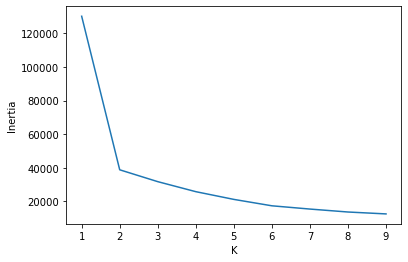

In [19]:
# 10.2.2 Selecting the optimal K using the elbow method
# Elbow Method: A method for estimating K with inertia and variance
# Plotting the K-means inertia
k_values = range(1, 10)
inertia_values = [KMeans(k).fit(darts).inertia_ for k in k_values]

plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

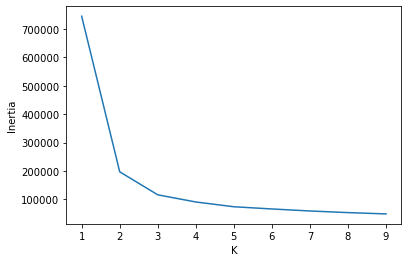

In [23]:
# Plotting inertia for a 3-dartboard simulation
new_bulls_eye = [12, 0]
for _ in range(5000):
    x = np.random.normal(new_bulls_eye[0], variance ** 0.5)
    y = np.random.normal(new_bulls_eye[1], variance ** 0.5)
    darts.append([x, y])
    
inertia_values = [KMeans(k).fit(darts).inertia_ for k in k_values]

plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# 10.3 Using density to discover clusters